In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']



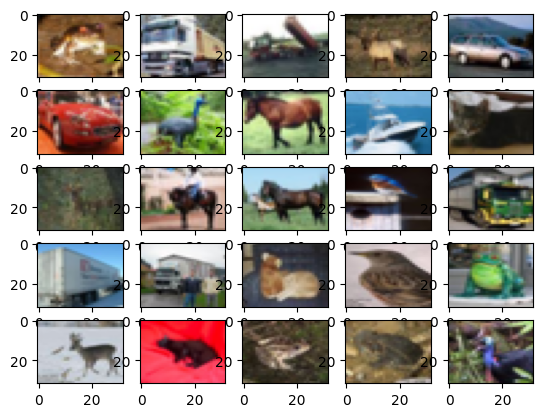

In [ ]:
fig, ax = plt.subplots(5,5)
k = 0
for i in range(5):
  for j in range(5):
    ax[i][j].imshow(X_train[k],aspect='auto')
    k +=1
plt.show()

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


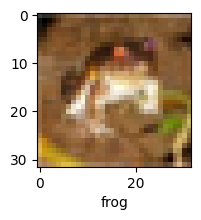

In [ ]:
plot_sample(X_train,y_train,0)

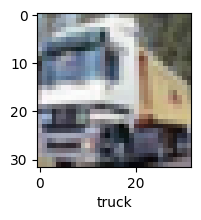

In [ ]:
plot_sample(X_train,y_train,1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer = 'SGD', loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3058 - loss: 1.9244
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4196 - loss: 1.6400
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4535 - loss: 1.5476
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4775 - loss: 1.4841
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4937 - loss: 1.4352


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.60      0.57      1000
           1       0.73      0.43      0.54      1000
           2       0.43      0.29      0.34      1000
           3       0.36      0.35      0.35      1000
           4       0.44      0.38      0.40      1000
           5       0.36      0.41      0.38      1000
           6       0.61      0.40      0.49      1000
           7       0.40      0.74      0.52      1000
           8       0.64      0.61      0.62      1000
           9       0.52      0.62      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [ ]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3810 - loss: 1.6818
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6032 - loss: 1.1347
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6594 - loss: 0.9758
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6955 - loss: 0.8781
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7209 - loss: 0.8033
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7426 - loss: 0.7426
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7597 - loss: 0.6878
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7805 - loss: 0.6274
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7967 - loss: 0.5842
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8130 - loss: 0.5382


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6957 - loss: 0.9481


[0.9522339105606079, 0.6980000138282776]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.4380961e-04, 7.4690099e-05, 2.5334919e-04, 9.8810261e-01,
        2.9276107e-05, 1.0506778e-02, 2.3067860e-04, 7.4250907e-05,
        4.0889328e-04, 1.7568964e-04],
       [4.6745615e-04, 8.9708962e-02, 2.8684819e-06, 2.2006504e-06,
        1.6103726e-08, 5.6024900e-09, 1.2038519e-08, 2.2777167e-09,
        9.0579426e-01, 4.0241363e-03],
       [2.4783907e-02, 5.0698802e-02, 9.4815798e-04, 2.0093033e-02,
        1.1699187e-04, 6.3143991e-04, 3.7845490e-05, 7.4395374e-04,
        8.9754778e-01, 4.3980367e-03],
       [7.8014570e-01, 7.2512415e-04, 3.8415114e-03, 3.1240427e-04,
        1.7756483e-02, 9.8461482e-05, 1.3172567e-05, 4.5409534e-04,
        1.9663943e-01, 1.3504469e-05],
       [2.2403277e-07, 2.4340769e-04, 4.5087207e-02, 1.8824007e-02,
        3.0070031e-01, 2.0509744e-03, 6.3306540e-01, 8.5961628e-06,
        1.2871908e-05, 6.9681532e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

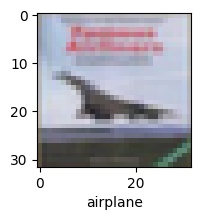

In [ ]:
plot_sample(X_test,y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'